# Case law opinion stats & sampling

This notebook outlines the steps undertook to sample the case law opinions (ensure the sample distribution by court adheres to the population distribution).

Datasets loaded from Development Database as of 1/30/2025 (Development Database does NOT have the latest data). But similar queries can be performed on replications. 

# Import libraries

In [1]:
import numpy as np
import pandas as pd

# Look at the distribution of opinions by courts in the population

In [2]:
opinion_stats = pd.read_csv("inputs/opinion_stats.csv")
opinion_stats

,court_id,opinion_count
0,nyappdiv,774668
1,scotus,521265
2,texapp,502421
3,fladistctapp,351140
4,ca9,222098
...,...,...
2075,paoytermctcarbo,1
2076,orcclake,1
2077,paoytermctclari,1
2078,oneidatrialct,1


In [3]:
opinion_stats.head(20)

,court_id,opinion_count
0,nyappdiv,774668
1,scotus,521265
2,texapp,502421
3,fladistctapp,351140
4,ca9,222098
5,la,213246
6,ca5,203963
7,ca4,173874
8,illappct,171956
9,ohioctapp,163629


In [4]:
opinion_stats.tail(20)

,court_id,opinion_count
2060,webchippewatr,1
2061,paorphctclario,1
2062,paorphctcamero,1
2063,pamunict,1
2064,pajuvctdel,1
2065,paorphctwayne,1
2066,pajuvctcambria,1
2067,padeptpubwel,1
2068,flacirct3ham,1
2069,flacirct20hen,1


In [5]:
opinion_stats["opinion_count"].describe()

count      2080.000000
mean       4650.715385
std       29759.900271
min           1.000000
25%           2.000000
50%          12.000000
75%         188.250000
max      774668.000000
Name: opinion_count, dtype: float64

In [6]:
opinion_stats["opinion_count"].value_counts()

opinion_count
1       361
2       168
3       110
4        83
6        57
       ... 
2422      1
2390      1
2327      1
2305      1
846       1
Name: count, Length: 643, dtype: int64

array([[<Axes: title={'center': 'opinion_count'}>]], dtype=object)

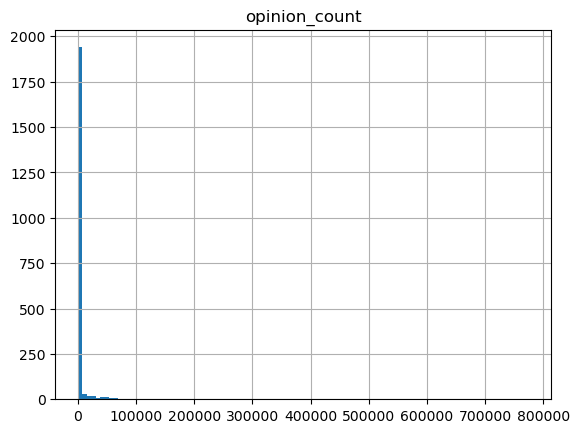

In [7]:
opinion_stats.hist(bins=100)

array([[<Axes: title={'center': 'opinion_count'}>]], dtype=object)

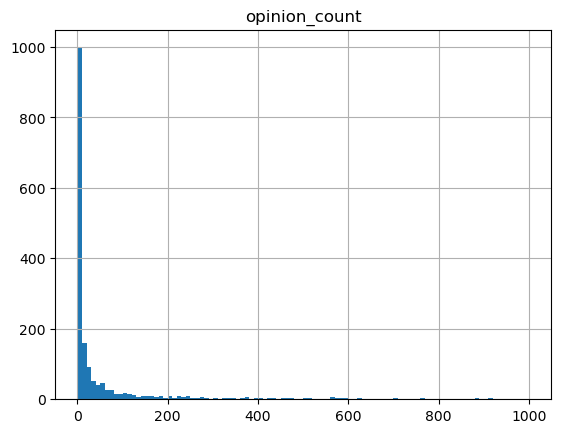

In [8]:
opinion_stats[opinion_stats["opinion_count"] < 1000].hist(bins=100)

array([[<Axes: title={'center': 'opinion_count'}>]], dtype=object)

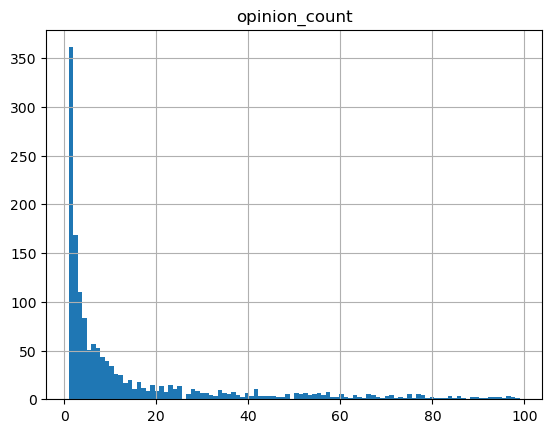

In [9]:
opinion_stats[opinion_stats["opinion_count"] < 100].hist(bins=100)

Very heavily skewed distribution of opinions by courts, we need to ensure the sample distribution is representative of the population distribution.

# Look at the distribution of opinions by courts in the sample

In [10]:
sampled = pd.read_csv("inputs/random_opinion.csv")
sampled

,id,date_created,date_modified,type,sha1,download_url,local_path,plain_text,html,html_lawbox,...,start_date,end_date,jurisdiction,notes,pacer_court_id,fjc_court_id,pacer_has_rss_feed,date_last_pacer_contact,pacer_rss_entry_types,parent_court_id
0,444587,2011-08-23 09:37:07+00,2023-08-05 04:12:40.860263+00,010combined,8079e7d17db825002e3e84d1ca4e95b1b230fe40,http://bulk.resource.org/courts.gov/c/F2/748/7...,NaN,NaN,"<p class=""case_cite"">748 F.2d 972</p>\n <p ...",NaN,...,1891-03-03,NaN,F,NaN,5.0,5,f,NaN,NaN,NaN
1,9410469,2023-07-21 14:07:23.906127+00,2023-07-21 15:10:53.580684+00,010combined,11ceaec7c3e06ead7db7bc2c17c59541427c098f,https://www.nebraska.gov/apps-courts-epub/publ...,pdf/2023/07/21/np_dodge_mgmt._co._v._holcomb.pdf,Nebraska Supreme Court Online Library\nwww.neb...,NaN,NaN,...,1854-01-01,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,714663,2012-04-17 06:49:10+00,2022-03-08 05:46:05.427551+00,010combined,8ec3e40994a1f967e668898eb39acd3bedd055cd,http://bulk.resource.org/courts.gov/c/F3/78/78...,NaN,NaN,"<p class=""case_cite"">78 F.3d 599</p>\n <p c...",NaN,...,1980-10-14,NaN,F,NaN,11.0,11,t,NaN,opinions,NaN
3,2729050,2014-09-08 21:38:34.377891+00,2022-03-09 00:46:53.474332+00,010combined,3a35b2ef1a18590b49a158949595bb7ba14e42de,http://www.in.gov/judiciary/opinions/pdf/11011...,pdf/2012/11/01/darrius_woods_v._state_of_india...,"Pursuant to Ind. Appellate Rule 65(D),\nthis M...",NaN,NaN,...,1891-01-01,NaN,SA,Created by Lawbox\r\nStart date: http://www.in...,NaN,NaN,NaN,NaN,NaN,NaN
4,692963,2012-04-17 05:18:08+00,2023-08-05 12:31:20.633974+00,010combined,77730da5d3a71908d6e3023a7e44de2a387ec5bd,http://bulk.resource.org/courts.gov/c/F3/51/51...,NaN,NaN,"<p class=""case_cite"">51 F.3d 288</p>\n <p c...",NaN,...,1893-02-09,NaN,F,NaN,12.0,0,t,NaN,"orders,opinions,judgments",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,524265,2011-08-23 10:00:25+00,2022-03-08 03:29:34.343665+00,010combined,93883994ea4fede70681f0f6b47fa81f1a703728,http://bulk.resource.org/courts.gov/c/F2/876/8...,NaN,NaN,"<p class=""case_cite"">876 F.2d 266</p>\n <p ...",NaN,...,1891-03-03,NaN,F,NaN,2.0,2,t,NaN,"orders, opinions",NaN
949,839254,2013-03-01 21:46:23.176345+00,2022-03-08 08:42:13.16712+00,010combined,7cb10ff74f2dfdbc107282d053aed279398491ea,http://publicdocs.courts.mi.gov:81/SCT/PUBLIC/...,pdf/2008/06/23/people_of_mi_v._steven_anthony_...,Order ...,NaN,<div>\n<center><b>750 N.W.2d 177 (2008)</b></c...,...,1837-01-01,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,563586,2011-08-23 10:11:53+00,2022-03-08 03:57:02.230031+00,010combined,2d74672e12e59d9a6b5179b82b4911c92d7d8b62,http://bulk.resource.org/courts.gov/c/F2/936/9...,NaN,NaN,"<p class=""case_cite"">936 F.2d 585</p>\n <p ...",NaN,...,1980-10-14,NaN,F,NaN,11.0,11,t,NaN,opinions,NaN
951,9607832,2023-08-22 03:02:22.627003+00,2023-08-22 03:02:22.627019+00,030concurrence,NaN,NaN,NaN,NaN,NaN,NaN,...,1863-01-01,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
f'{len(sampled)} samples is ~{round(len(sampled)/opinion_stats["opinion_count"].sum()*100,2)}% of the {opinion_stats["opinion_count"].sum()} opinions'

'953 samples is ~0.01% of the 9673488 opinions'

In [12]:
sampled["court_id"].value_counts()

court_id
nyappdiv           79
scotus             53
texapp             43
fladistctapp       32
ca5                23
                   ..
pawb                1
mdctspecapp         1
ohnb                1
circtdct            1
nydistctsuffolk     1
Name: count, Length: 184, dtype: int64

In [13]:
f'{sampled["court_id"].nunique()} courts is ~{round(sampled["court_id"].nunique()/len(opinion_stats)*100,1)}% of the {len(opinion_stats)} courts'

'184 courts is ~8.8% of the 2080 courts'

In [14]:
f'{sampled["court_id"].value_counts().nlargest(20).sum()} opinions is ~{round(sampled["court_id"].value_counts().nlargest(20).sum()/sampled["court_id"].value_counts().sum()*100,1)}% of the {sampled["court_id"].value_counts().sum()} sampled opinions'

'467 opinions is ~49.0% of the 953 sampled opinions'

<Axes: >

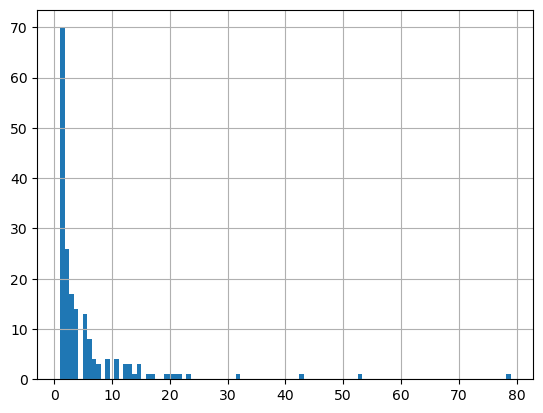

In [15]:
sampled["court_id"].value_counts().hist(bins=100)

The sample distribution is similar to that of the population distribution and we have a decent coverage of courts, a good starting sample.